In [25]:
# Install dependencies
!apt-get install -y tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [29]:
# Import libraries

import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"


In [30]:
# Preprocess image (grayscale, denoise, enhance, threshold)

def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 3)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(blur)
    _, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary


In [31]:
# Perform Tesseract OCR and draw bounding boxes

def draw_tesseract_boxes(original_img, processed_img, psm=6):
    img_copy = original_img.copy()
    config = f"--oem 3 --psm {psm}"

    # OCR with detailed data
    boxes = pytesseract.image_to_data(processed_img, config=config, output_type=pytesseract.Output.DICT)
    extracted_text = ""

    for i in range(len(boxes['text'])):
        text = boxes['text'][i].strip()
        conf = int(boxes['conf'][i])
        if conf > 60 and text != "":
            x, y, w, h = boxes['left'][i], boxes['top'][i], boxes['width'][i], boxes['height'][i]
            extracted_text += text + " "
            cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    return img_copy, extracted_text.strip()


Original Image:


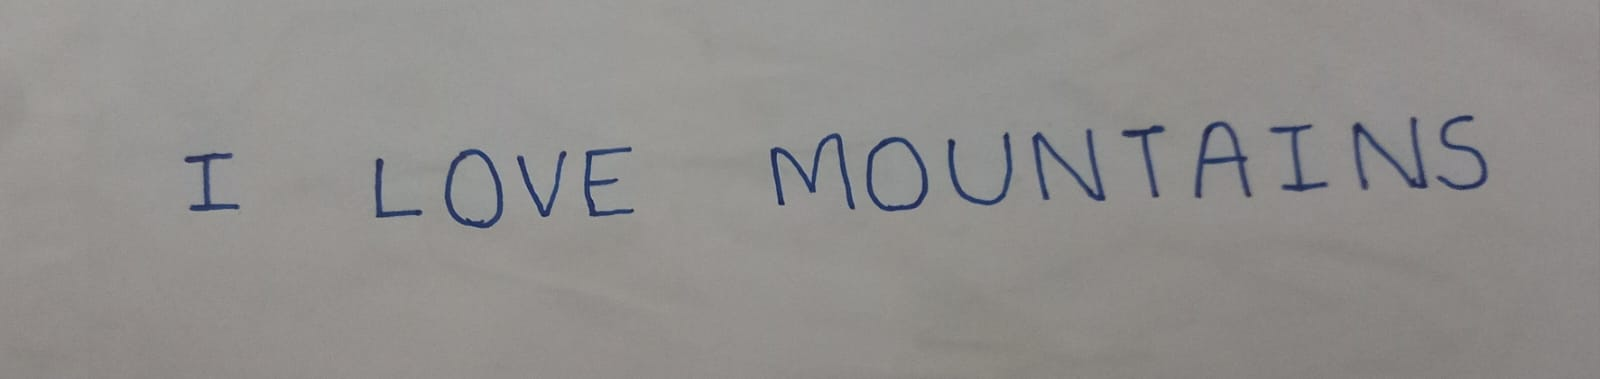


Image with Bounding Boxes:


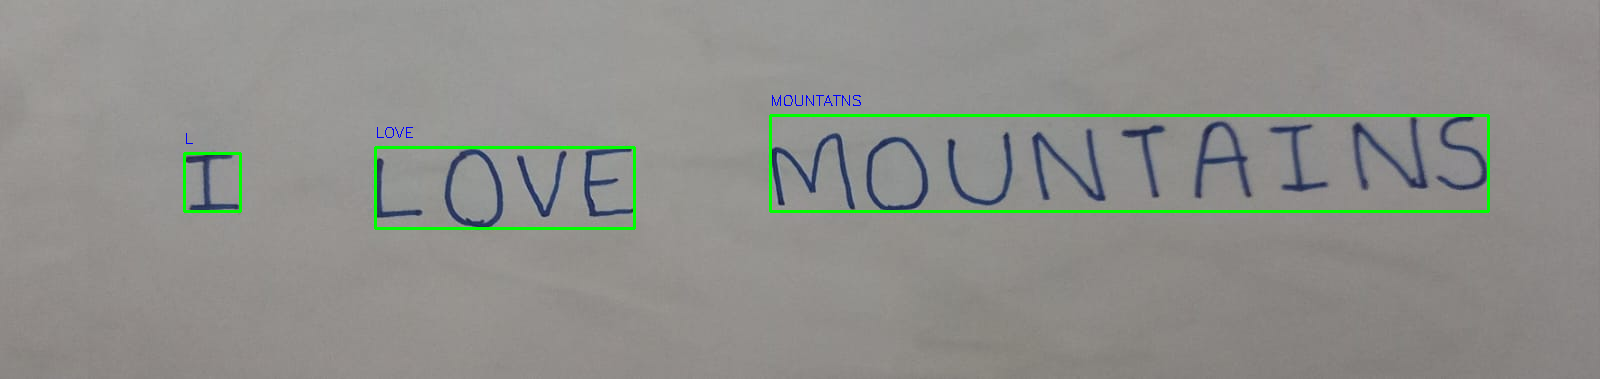


Extracted Text:
L LOVE MOUNTATNS


In [33]:
# Load image, run OCR, display original and result

img_path = "/content/drive/MyDrive/Colab Notebooks/TestImage2.jpg"
image = cv2.imread(img_path)

if image is None:
    print(f"Could not load image: {img_path}")
else:
    print("Original Image:")
    cv2_imshow(image)

    # Step 1: Preprocess
    preprocessed = preprocess_image(image)

    # Step 2: Apply Tesseract and draw boxes
    boxed_image, extracted_text = draw_tesseract_boxes(image, preprocessed, psm=11)

    print("\nImage with Bounding Boxes:")
    cv2_imshow(boxed_image)

    print("\nExtracted Text:")
    print(extracted_text)


